# LendingClub Exploration
On Canvas (or in this notebook's files) you’ll find a new file, **lendingclub.csv**. Each row of **lendingclub.csv** represents a single user
account on **LendingClub.com**. The site consists of two types of users, **borrowers** who are applying for a new loan, and **investors** who lend money for fixed periods of time. Each row in our dataset represents a single borrower at the time they apply for their first peer-to-peer loan, and each row contains nine columns:

- Amount requested for their first loan
- Year the loan was requested (this dataset covers only a five-year period, 2008-2012)
- Title of the loan application (written by the borrower)
- FICO score (credit rating) of the borrower
- “Debt-to-Income”: A ratio of the borrower’s total monthly debt payments, excluding home
mortgage and the requested loan, to the borrower’s self-reported monthly income.
- ZIP code of the borrower (the last two digits of each ZIP are masked for anonymity)
- U.S. state that the borrower resides in.
- Length of time that the borrower has been employed at their current job, from 0 to 10+ years.
- A binary outcome variable for whether the user’s loan application was accepted by investors.

Our goal with this project will be to automatically predict whether a borrower will be approved for a loan from the investor members of the website, based only on the data provided above. For each of the following questions, add a series of code and markdown cells to develop an easily readable report responding to the question. 

# Question 1:
- Why is this data about users valuable to LendingClub?
- Name at least two different ways this automated prediction could be used either for in-app product changes, or business decision-making.

# Answer 1:


The User data can be a bridge for LendingClub to **higher revenues**, through generating more matching transactions and attracting more users.
According to the company, the revenue sources can be categorized as followed:
1. transaction fees from our platform's role in matching borrowers with investors to enable loan originations;
2. servicing fees from investors;
3. management fees for investment funds and other managed accounts. 

Therefore, the higher matching transaction rates and more higher traffic on the platform will enable higher revenues for LendingClub. The user data and the machine learning algorithm based on the data make it possible for the company to more efficiently match a borrower with the investors with higher willingness to lend the money. However, in the case that we only have the borrower data, we can only deliver the common features of the welcomed borrowers for the lender users in general, rather than directly helping the borrowers match the lender users to efficiently meet their loan needs. 
Based on the valuable borrower data and the prediction algorithm, we can make recommendations for LendingClub in the following scenarios:
1. Send more push notifications and in-app messages to the existing customers who are predicted to be accepted users to remind them of the needs to purchase or directly request the loan.
2. Categorize the features of the borrowers who are more 'welcomed' by the investoer members on the website, and attract these potential users with specific targeting market strategy like advertisements, discounts on fees, etc. 

While more deals can be concluded on the platform, there can be more revenues generated from the previously mentioned three ways.



# Question 2: 
Train a decision tree classifier to predict loan acceptance based on the features provided. Write a report giving at minimum the following information on your model:
- Class distribution of the outcome labels.
- List of features you used from the data, including their name and data type (numeric or
nominal). For each feature, provide min, mean, and max values (if the feature is numeric) or
list all possible labels (if the feature is nominal).
- List of hyperparameter settings for the decision tree.
- Performance of the trained classifier, using metrics like accuracy, kappa, precision, and recall. You must provide a labeled confusion matrix.

You should NOT perform any optimization; all you need to do is train a single decision tree and report results. You will be tuning hyperparameters and performing other evaluations in Homework 2.

## 1. Data Preprocessing
### 1.1. Package and Dataset Import

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.6/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [0]:
# Download dataset
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3' -O lendingclub.csv
https://docs.google.com/spreadsheets/d/e/2PACX-1vRfV218SmMXHvnmCUMHA21PWFWC-lRk8VFgEbxHlqPjtwLRKGvVDQsdMFWc16jyq5D1JZoibnm6REh3/pub?output=csv

--2020-02-03 19:42:44--  https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.113, 172.217.204.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g2ofbk51itvl9udbd0a55cc28rr6omn9/1580752800000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download [following]
--2020-02-03 19:42:45--  https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g2ofbk51itvl9udbd0a55cc28rr6omn9/1580752800000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download
Resolving doc-10-5c-docs.googleusercontent.com (doc-10-5c-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connecting t

In [0]:
lendingclub_raw = pd.read_csv('lendingclub.csv')
print(f'Shape of the DataFrame of borrowers:{lendingclub_raw.shape}')
print('\nHead of the DataFrame of borrowers:')
print(lendingclub_raw.head())
print('\nInformation of the DataFrame of borrowers:')
print(lendingclub_raw.info())

Shape of the DataFrame of borrowers:(81103, 11)

Head of the DataFrame of borrowers:
    amount      date                    title  ...  policy_code  year outcome
0   2500.0  Dec-2011                     bike  ...          1.0  2011  accept
1  12000.0  Dec-2011            Consolidation  ...          1.0  2011  accept
2  21000.0  Dec-2011             Debt Cleanup  ...          1.0  2011  accept
3  31825.0  Dec-2011  Debt Consolidation Loan  ...          1.0  2011  accept
4  12000.0  Dec-2011       Debt Consolidation  ...          1.0  2011  accept

[5 rows x 11 columns]

Information of the DataFrame of borrowers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81103 entries, 0 to 81102
Data columns (total 11 columns):
amount         81103 non-null float64
date           81103 non-null object
title          81103 non-null object
fico           81103 non-null float64
dti            81103 non-null float64
zip            81103 non-null object
state          81103 non-null object
emp_lengt

### 1.2. Data Cleaning and Normalization
Among the 81,103 borrowers' information, there is no missing value. Among the 11 variables, there are 6 variables in the format of object. For the three variables of `date`, `title`, `emp_length`, and `outcome`, I will convert them into the numeric information. For the two location variables of `zip` and `state`, I will directly drop them for our analysis since the peer-to-peer loan is an online business.

In [0]:
# Generate a copy of DataFrame for cleaning
lendingclub_cl = lendingclub_raw.copy()

# Clean the date column
# Extract the month information from the column
lendingclub_cl['month'] = pd.to_datetime(lendingclub_cl['date']).dt.month

# Clean the title column
# Extract the word number of titles
lendingclub_cl['title_length'] = lendingclub_cl['title'].str.len()

# Clean the outcome column
# Convert the String into Boolean variable
# The cleaned variable is also the prediction variable
lendingclub_cl['accept'] = lendingclub_cl['outcome'].apply(lambda x: True if x== 'accept' else False)

NameError: ignored

In [0]:
# Define a function to convert the string of employment year into the numeric format
def emp_length_string_to_num(str):
    length_dict={'< 1 year':0.5, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10.5}
    for length_name, length in length_dict.items():
        if str==length_name:
            return length

# Apply the function to the emp_length column
lendingclub_cl['emp_years'] = lendingclub_cl.emp_length.apply(emp_length_string_to_num)

In [0]:
# Drop the three original variables and the location variables
lendingclub_cl = lendingclub_cl.drop(['date','title','outcome','emp_length','zip','state'],axis=1,inplace=False)

print('Information of the DataFrame of borrowers:')
print(lendingclub_cl.info())

Information of the DataFrame of borrowers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81103 entries, 0 to 81102
Data columns (total 9 columns):
amount          81103 non-null float64
fico            81103 non-null float64
dti             81103 non-null float64
policy_code     81103 non-null float64
year            81103 non-null int64
month           81103 non-null int64
title_length    81103 non-null int64
accept          81103 non-null bool
emp_years       81103 non-null float64
dtypes: bool(1), float64(5), int64(3)
memory usage: 5.0 MB
None


## 2. Exploratory Data Analysis
### 2.1. Correlation Analysis

[Text(0.5, 0, 'amount'),
 Text(1.5, 0, 'fico'),
 Text(2.5, 0, 'dti'),
 Text(3.5, 0, 'policy_code'),
 Text(4.5, 0, 'year'),
 Text(5.5, 0, 'month'),
 Text(6.5, 0, 'title_length'),
 Text(7.5, 0, 'accept'),
 Text(8.5, 0, 'emp_years')]

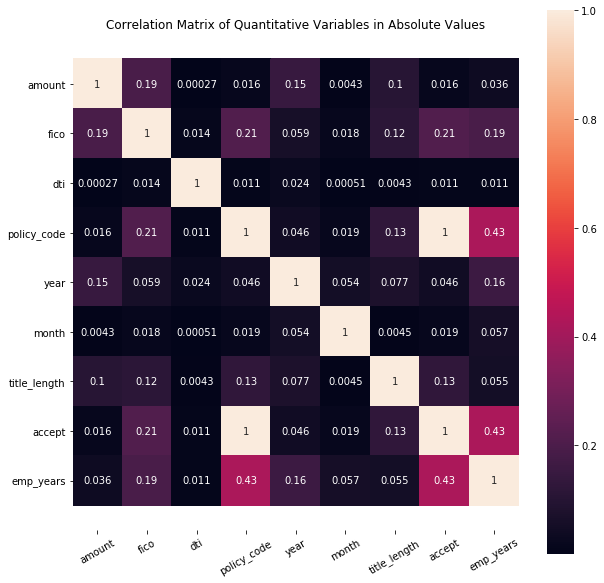

In [0]:
corr_abs = lendingclub_cl.corr().abs()

# Plot correlation with selected quantitative columns
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_abs, square=True, annot=True, fmt='.2g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix of Quantitative Variables in Absolute Values')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
# plt.savefig('Correlation_Matrix.png')

#### Some observations:
The correlation matrix is of mostly dark colors, indicating that these variables are of overall low correlation. Variables of `fico` and `emp_years` are of relatively higher correlation with `accept`, Especially, the `policy_code` is completely equivalent to our target variable, which should be dropped from our analysis. The variables of `fic0`, `policy_code`, `accept`, and `emp_years` are related to other variables at the relatively higher levels.

Then, the more specific correlation exploration focusing on the target variable should be introduced.

## 2.2. Correlation between target variables and  feature variables

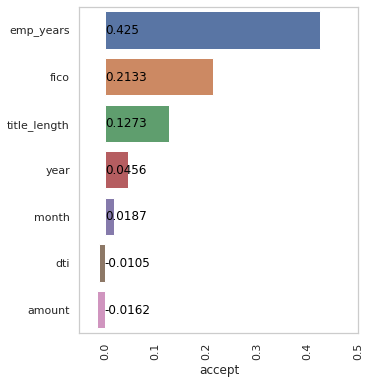

In [0]:
# Calculate the correlation between feature variables and the target varaible
corr = lendingclub_cl.corr()
corr_accept = corr.loc[corr['accept']!=1, 'accept'].sort_values(ascending = False)

# Use bar chart to visualize the correlation
plt.figure(figsize=(5,6))
sns.set(style="whitegrid")
sns.light_palette("navy", reverse=True)
ax = sns.barplot(y=corr_accept.index, 
                 x=corr_accept.astype(np.float))
y = 0
for index, value in corr_accept.iteritems():
    ax.text(0, y, round(float(value),4), color='black',va='center')
    y+=1
ax.set_xlim(-0.05,0.5)
plt.xticks(rotation=90)
plt.grid(False)
#plt.savefig('corr_accept.png', bbox_inches='tight')

#### Some observations:
1. It's reasonable that `emp_yeas` is highly related to target variables, because people with more years of work experience tend to have more stable income, which is an important indicator that he/she is capable of paying the money back on time.
2. It's also reasonable that `fico` ranks high in the correlation table, since FICO scores are reliable creditworthiness indicators based on a person's credit history.
3. It makes sense that `title_length` is positively correlated with request outcomes, since the word number of the title can be an indicator of the application attitudes of the borrowers. Those who are more attentive to the loan application, will fill the application form out more carefully. Therefore, their loan request are more likely to be approved.
4. The positive correlation between `year` and target variable is interesting. During the longer years after 2008, people tend to hold a more positive attitude toward such new way of loan.
5. It makes sense that `amount` is negatively related to the loan request outcome. The larger request amount suggests the higher risks.


In [0]:
# Remove the duplicate traget variable from the DataFrame
lendingclub_cl = lendingclub_cl.drop('policy_code',axis=1,inplace=False)
lendingclub = lendingclub_cl.copy()

## 3. Decision Tree
To reach the goal of predicting whether a borrower will be approved for a loan, a machine learning model needs introducing in this project.


### 3.1. Creating the Train/Test Split
The target variable is `accept`, which is a binary variable. Therefore, the prediction models should be a classification model. Since Decision Tree can work better with fewer variables in general, Decision Tree will be applied to predict the outcomes of the loan request.

In [0]:
y=lendingclub['accept']
X=lendingclub.drop('accept',axis=1,inplace=False)

### 3.2. Variables Description
#### 3.2.1. Target Variable Distribution

Text(0.5, 1.0, 'Imbalanced Distribution of Loan Request Outcomes')

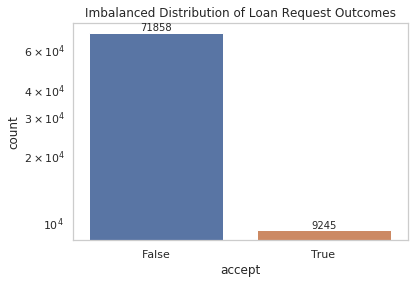

In [0]:
# Use bar chart to visualize the distribution
sns.countplot('accept', data=lendingclub)
plt.yscale("log")
for a, b in zip(y.value_counts().index,y.value_counts()):
    plt.text(a, b+0.1, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.grid(False)
plt.xticks(rotation=360)
plt.title('Imbalanced Distribution of Loan Request Outcomes')

#### Some observations:
The target variables is of significantly imbalanced distribution.Without fixing the issue of imbalanced distribution, the model can be biased. Therefore, resampling should be introduced.


#### 3.2.2. Feature Variables Distribution
There are seven feature variables in the prediction model. Through Data preprocessing, all feature variables have been converted into the numeric format.

In [0]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,81103.0,12959.437855,10315.880464,500.0,5000.00,10000.00,20000.00,500000.0
fico,81103.0,603.010961,173.772811,0.0,585.00,653.00,691.00,850.0
dti,81103.0,514.269499,17004.663297,-1.0,6.53,16.48,28.88,3418800.0
year,81103.0,2011.097062,1.077031,2008.0,2011.00,2011.00,2012.00,2012.0
month,81103.0,7.191189,3.346244,1.0,4.00,7.00,10.00,12.0
title_length,81103.0,13.505123,8.979191,1.0,7.00,14.00,18.00,908.0
emp_years,81103.0,2.004846,2.996511,0.5,0.50,0.50,2.00,10.5


#### Some Observation:
These six variables are all in the numeric format. As the following table indicates, they can be categorized into three types of information.


| Groups |   Variables (Column name)  | Description |
|-------|---------|---------|
| **Content**     | `title_length`    | Word number of the request title |
|   |   `amount`   | Amount requested for their first loan |
| **Credit**     | `fico`    | FICO scores |
|   |   `dti`   | A ratio of the borrower’s total monthly debt payments |
|    |  `emp_years`    | The year of the work experience |
| **Time**     | `year`   | The year of the loan request |
|   |  `month`    | The month of the loan request |



We can refer to the EDA section for more information of the feature variables, including the correlation between these feature variables and the outcome of the loan request.


### 3.3 Resampling
Introduce undersampling to fix the issue of imbalanced distribution.

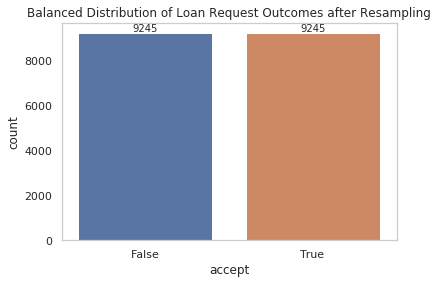

In [0]:
# Shuffle the Dataset.
shuffled_df = lendingclub.sample(frac=1,random_state=123)

# Put out all the accepted cases
accept_df = shuffled_df.loc[shuffled_df['accept'] == True]

#Randomly select 9245 observations from the rejected cases
reject_df=shuffled_df.loc[shuffled_df['accept']== False].sample(n=9245,random_state=123)

# Concatenate both dataframes 
normalized_df = pd.concat([accept_df, reject_df])

# plot the distribution after the undersampling
sns.countplot('accept', data=normalized_df)
for a, b in zip(normalized_df.accept.unique(),normalized_df.accept.value_counts()):
    plt.text(a, b+0.1, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.title('Balanced Distribution of Loan Request Outcomes after Resampling')
plt.grid(False)

In [0]:
# Retrieve the feature variables and target variables after resampling
y=normalized_df['accept']
X=normalized_df.drop('accept',axis=1,inplace=False)

In [0]:
# Re-explore the feature variables after resampling
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,18490.0,12815.938813,9270.459246,500.0,5000.00,10000.00,19000.0000,50000.0
fico,18490.0,648.677772,141.616530,0.0,644.00,680.00,710.0000,844.0
dti,18490.0,216.049658,6092.416870,-1.0,8.17,15.55,23.5375,199998.0
year,18490.0,2011.157761,1.064444,2008.0,2011.00,2012.00,2012.0000,2012.0
month,18490.0,7.262520,3.351912,1.0,5.00,8.00,10.0000,12.0
title_length,18490.0,14.919362,7.639650,1.0,9.00,16.00,18.0000,144.0
emp_years,18490.0,3.548594,3.745198,0.5,0.50,2.00,6.0000,10.5


#### Some observations:
The size of the dataset has dropped significantly to fix the issue of imbalanced distribution, indicating a huge lose of information. However, there is no huge difference among the featured variables in the new dataset.


### 3.4. Training and Prediction
Set the hyperparameters of `criterion`, `random_state`, `min_samples_split`, and`max_depth` to construct the Decision Tree Model.

In [0]:
# Creating the Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=111)

# Initiate the Decision Tree Model
dt = DecisionTreeClassifier(criterion="entropy", random_state=123, min_samples_split=5,max_depth=20)

# Train the model
model = dt.fit(X_train, y_train)

# Get Prediction
y_pred = model.predict(X_test)

### 3.5. Evaluation for Model Quality
The four metrics of accuracy, kappa, precision, and recall need applying for evaluation.

In [0]:
# Define a function that takes in the predictions of a classifier, the true labels,
# and a set of metrics and displays the model's performance on the metrics
def common_evaluations(y_pred, y_actual, metrics):
    # Compute Metrics
    conf_matrix = confusion_matrix(y_actual, y_pred)
    model_results = {}
    for (metric_name, metric) in metrics.items():
        result = metric(y_actual, y_pred)
        model_results[metric_name] = result

    # Display Metrics
    ConfusionMatrixDisplay(conf_matrix, ["Reject", "Accept"]).plot(values_format='.4g')
    plt.title(f'Confusion Metrics for Decision Tree')
    plt.grid(False)
    plt.savefig(f'evaluation_for_Decision_Tree.png')
    print(model_results)
    
    return model_results

{'Accuracy': 91.67117360735533, 'Kappa': 0.8334273699494075, 'Precision': 0.9104155423637345, 'Recall': 0.9223619464188081}


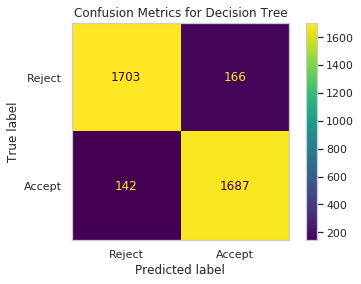

In [0]:
# generate a quality evaluation metrix
metrics = {
    "Accuracy" : lambda y_test,y_pred: 100*accuracy_score(y_test,y_pred),
    "Kappa"    : cohen_kappa_score,
    "Precision": precision_score,
    "Recall"   : recall_score
}

model_results = common_evaluations(y_pred, y_test, metrics)

#### Some observations:
According to the Confusion metrics and four quality metrics, the decision tree model is of good quality. More specific, 91.67% of the prediction outcomes are right. The Kappa is 0.83, larger than 0.8, indicating that the prediciton can be almost perfect. Among the prediction outcomes of accept, 91.04% are right. Then, among the actual outcomes of accept, 92.23% are predicted as accept as well.




# Question 3: 

Is the decision tree that you trained accurate enough to be used for each of the two business purposes you proposed in question 1? Why or why not?

The accuracy of the model is 91.67%, indicatin that the quality of this model can meet the requirement of the application in the two scenarios I have proposed in the Question 1.

1. Send more push notifications and in-app messages to the existing customers who are predicted to be accepted users to remind them of the needs to purchase or directly request the loan.
2. Categorize the features of the borrowers who are more 'welcomed' by the invester members on the website, and attract these potential users with specific targeting market strategy like advertisements, discounts on fees, etc.

These two scenarios are two marketing strategies targeting on different markets; one is the existing market, and the other is the new customers. Therefore, if I can apply the prediction model on the existing clients, under the situation that the outcomes is `accept`, I can can make recommendation to LendingClub to stimulate their shopping desires and will thus request the loan on LendingClub. To be more specific, if I was predicted as the accepted user, I will receive the message and notification from LendingClub that reminds me of my needs for a loan. Then, I will request another loan on the platform. Even though my purchase desires haven't been stimulated by the mobile marketing strategy, LendingClub doesn't suffer losses at all. The variable costs of the message or mobile notification are closely 0. 

In the second scenario, I have never used LendingClub before. However, through the third party data company, LendingClub is capable of getting my data and apply the decision tree model on me. It can categorize me into the group whether I am the potential users based on the prediction outcomes. Even though I am categorized as a potential user but I am not in reality, the marketing strategy targeting on me won't cost LendingClub too much, which is in the same case of the first scenario.

In conclusion, in these two individual customers recruiting scenarios, there is no need to guarantee the accuracy at a very high level, since the wrong prediction won't have significant negative influences on LendingClub, even the increase in the operation cost. However, it would be a completely different story than in the healthcare industry or in the business decision related to a large amount of investment. 

 